# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Conclusion](#finalconclusion)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# importing 'ab_data.csv' data file
df = pd.read_csv ("ab_data.csv")
# Display the top five rows from the loaded data file
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# Display the number of rows
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [4]:
# Display the number of unique users 
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [5]:
# The proportion of users converted
df['converted'].mean()
# Alternative code
df['converted'].sum()/df.shape[0]

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# Display the number of times the "group" is treatment but "landing_page" is not a new_page
df.query('group == "treatment" & landing_page != "new_page"').shape[0]

1965

**f.** Do any of the rows have missing values?

In [7]:
# Display the number of rows having null values
df.shape[0] - df.dropna().shape[0]

0

No rows with missing data in the dataset

### ToDo 1.2  
The rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows where the 'group' and 'landing_page' columns don't match, and store the result in a new dataframe df2
df2 = df.drop(df.query('group == "treatment" & landing_page != "new_page" | group == "control" & landing_page != "old_page"').index)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Part 1.3**.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
# The number of unique users in df2 from 'user_id' column
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Display the duplicated users from 'user_id' column
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
# Display a row with duplicated 'user_id' information
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop(df2[df2.duplicated(['user_id'])].index)
# Check again if the row with a duplicate user_id is deleted or not
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


### ToDo 1.4  
Use **df2** and the cells below to answer questions for **Part 1.4**.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [14]:
# Display the probability of an individual converting
#This is also the overall "converted" success rate in the population (p-population).
conversion_rate = df2['converted'].mean()
conversion_rate 

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Display the probability of an individual converting from the "control" group
control_propability = df2.query('group == "control" & converted == 1').shape[0] / df2.query('group == "control"').shape[0]
control_propability

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Display the probability of an individual converting from the "treatment" group
treatment_propability = df2.query('group == "treatment" & converted == 1').shape[0] / df2.query('group == "treatment"').shape[0]
treatment_propability

0.11880806551510564

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_propability - control_propability
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
# Display the probability of an individual received the new page
new_page_propability = df2.query('landing_page == "new_page"').count()[0] / df.shape[0]
new_page_propability

0.49344942576355449

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

The difference in **conversion rate** between the `control` and the `treatment` groups is **15%**; Such a minor difference in the conversion rate does not indicate any sufficient evidence to suggest: The new treatment page leads to more conversions.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

<center>
$H_{0}$ : $p_{new}$ ≤ $p_{old}$
<br>
$H_{1}$ : $p_{new}$ > $p_{old}$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

Use the cells below to provide the necessary parts of this simulation.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
conversion_rate

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
conversion_rate

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [21]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br> Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.

In [23]:
# Simulate a Sample for the treatment Group
# new_page_converted = np.random.choice(2, n_new, replace = True, p=[(1-conversion_rate), conversion_rate])
new_page_converted = np.random.choice(2, n_new, conversion_rate)
new_page_converted

array([0, 1, 1, ..., 1, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice(2, n_old, conversion_rate)
old_page_converted

array([1, 0, 0, ..., 0, 1, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
converted_probability_diff = p_new - p_old
converted_probability_diff

-0.00293901927266077


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. <br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Sampling distribution
p_diffs = []
p_new = conversion_rate
p_old = conversion_rate
new_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_simulation - old_simulation
p_diffs

array([ -1.11698013e-03,  -1.59885551e-03,   3.69532869e-04, ...,
        -9.82889201e-05,  -1.57145776e-03,  -7.45695087e-04])

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br>
Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

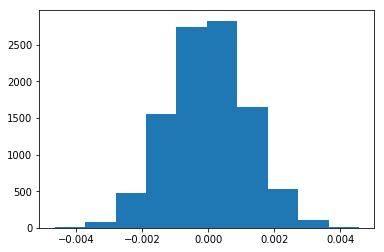

In [27]:
plt.hist(p_diffs)
plt.show()

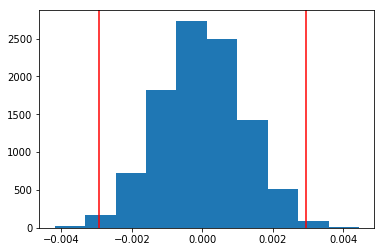

In [28]:
h_null = np.random.normal(0, np.std(p_diffs),10000)

plt.hist(h_null);
plt.axvline(converted_probability_diff, color = 'red');
plt.axvline(-converted_probability_diff, color = 'red');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [29]:
(p_diffs > obs_diff).mean()

0.90620000000000001

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

- What we computed in point **(j)** was the `p-value`, which is the probability that we will observe this statistic, in the case that the null hypnothesis is true.
- Since the `p-value` is higher than the **Type I error rate** of (5%), **we fail to reject the null hypothesis** and the treatment page does not have higher conversion rates than the control page on a statistical basis.

**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance.

In [30]:
import statsmodels.api as sm
# number of conversions with the old_page
convert_old = df.query('group == "control" & converted == 1').shape[0]
# number of conversions with the new_page
convert_new = df2.query('group == "treatment" & converted == 1').shape[0]
# number of individuals who were shown the old_page
n_old = df2.query("landing_page == 'old_page'").shape[0]
# number of individuals who received new_page
n_new = df2.query("landing_page == 'new_page'").shape[0]
# Testing our results
convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17723, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [31]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-2.6411875940931551, 0.99586920197633411)

**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The `z-score` and `p-value` we computed from the test statistic suggests that the conversion rates for both old and new pages are not statistically different from one another, the `p-value` (0.09) still larger than the **type I error rate** (0.05) which also affirms **not rejecting the null hypothesis**.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br>

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

A `logistic regression` since we are looking at *binary variables*.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [32]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [33]:
my_reg_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = my_reg_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-11-23 18:58 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [35]:
np.exp(result.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [36]:
1/np.exp(result.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?


- Both cases `p-value` are higher than the accepted **Type I error rate (0.05)**, the results do not support the alternative hypothesis sufficiently.
<br>
- The `p-value` is different in **part II (0.91)** from **part III (0.19)** because of using different null and alternative hypothesis here.
<br>
$H_{0}$ : $p_{new}$ - $p_{old}$ = $0$
<br>
$H_{1}$ : $p_{new}$ - $p_{old}$ != $0$

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- It is a good idea to incorporate more factors that could potintially influence the conversion rate into the model, like **`users` (old & new)**, this data includes a single factor influencing the conversion rate **`page type`**.
<br>
- The disadvantages comes from the data itself, using incomplete data leads to erroneous conclusions.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [37]:
# Reading the countries.csv and viewing the first 5 rows of data
countries = pd.read_csv("countries.csv")
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# Joining countries and df2 dataframes into df_merged and viewing the first 5 rows of data
df_merged = countries.merge(df2)
df_merged.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [39]:
# Create the necessary dummy variables
df_merged[['UK','US','CA']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [40]:
# Fitting our model, and summarize the results
country_reg_model = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'CA']])
results = country_reg_model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-11-23 18:58 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
CA             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [41]:
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
US           1.051944
CA           1.041599
dtype: float64

In [42]:
1/np.exp(results.params)

intercept    7.614303
ab_page      1.015056
US           0.950621
CA           0.960062
dtype: float64

**Statistically:**
<br>
- The country of residence had no impact on conversion rate **US 1.05** and **CA 1.04** are higher than **UK** (Baseline).
- The difference between `US and UK` (baseline) =  (1.051944 - 1) * 100 = **5.1944%**
- The difference between `CA and UK` (baseline) =  (1.041599 - 1) * 100 = **4.1599%**
<br><br>

**Practically:**
<br>
- Countries are irrelivant to include in this analysis.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 

Provide the summary results (statistical output), and your conclusions (written response) based on the results.

In [43]:
df_merged["ab_UK"] = df_merged["ab_page"] * df_merged["UK"]
df_merged["ab_CA"] = df_merged["ab_page"] * df_merged["CA"]

In [44]:
legit_model = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'CA', 'ab_UK', 'ab_CA']])
legit_fit = legit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [45]:
legit_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-11-23 18:58 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page        0.0108    0.0228    0.4749  0.6349  -0.0339   0.0555
US             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
CA             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_UK         -0.0783    0.0568   -1.3783  0.1681  -0.1896   0.0330
ab_CA         -0.0314    0.0266   -1.1807  0.2377  -0.0835   0.0207
==================================================================

"""

In [46]:
np.exp(legit_fit.params)

intercept    0.134794
ab_page      1.010893
US           1.011854
CA           1.017682
ab_UK        0.924703
ab_CA        0.969090
dtype: float64

In [47]:
1/np.exp(legit_fit.params)

intercept    7.418713
ab_page      0.989224
US           0.988285
CA           0.982625
ab_UK        1.081428
ab_CA        1.031896
dtype: float64

In [48]:
# Checnking duration of the experiment
df_merged['timestamp'] = df_merged['timestamp'].apply(lambda x : pd.to_datetime(str(x)))
df_merged['dates'] = df_merged['timestamp'].dt.date

In [49]:
((df_merged['dates'].max() - df_merged['dates']. min()), 'days')

(datetime.timedelta(22), 'days')

**Statistically:**
<br>
- The conversion by country has no statistical significance since all `p_values` are large in all casses we failed to reject null.
<br><br>

**Practically:**
<br>
- The impact of `converion by country` is with **no significance**, the conversion rate for both US and CA is higher than UK.

<a id='finalconclusion'></a>
### Final Conclusion

- Countries conversion rate was irrelevant to the case.
- Duration of the experiment was 22 days.
- There is **15%** difference in the conversion rate between the `control` and `treatment` groups from the dataset itself, which imposed almost no effect to influence the decision to switch to the new page.
- We failed to reject the `Null` in all the 3 cases, **Descriptive analysis**, **A/B Testing**, and **Regression Modelling**.


Run the code cell below to create a .html version of this notebook in the workspace. If it worked correctly, you should get a return code of 0

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0